In [2]:
import pandas as pd

# Load the dataset C:\Users\kingsta\Desktop\week_1\task-1\data\raw\AAPL_historical_data.csv
data = pd.read_csv(r"C:\Users\kingsta\Desktop\week_1\task-1\data\raw\raw_analyst_ratings.csv")  # Adjust path if necessary
data.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
# Add a column for headline length
data['headline_length'] = data['headline'].apply(len)

# Descriptive statistics for headline lengths
data['headline_length'].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kingsta\AppData\Roaming\nltk_data...


                                            headline  sentiment_polarity
0            Stocks That Hit 52-Week Highs On Friday               0.000
1         Stocks That Hit 52-Week Highs On Wednesday               0.000
2                      71 Biggest Movers From Friday               0.000
3       46 Stocks Moving In Friday's Mid-Day Session               0.000
4  B of A Securities Maintains Neutral on Agilent...               0.296


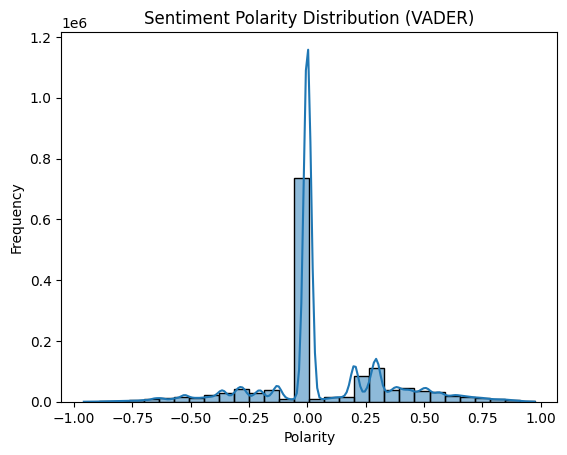

In [5]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Perform Sentiment Analysis
data['headline'] = data['headline'].fillna('').astype(str)  # Ensure headlines are strings
data['sentiment_polarity'] = data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display Sentiment Polarity for first few rows
print(data[['headline', 'sentiment_polarity']].head())

# Plot Sentiment Polarity Distribution
sns.histplot(data['sentiment_polarity'], kde=True, bins=30)
plt.title('Sentiment Polarity Distribution (VADER)')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


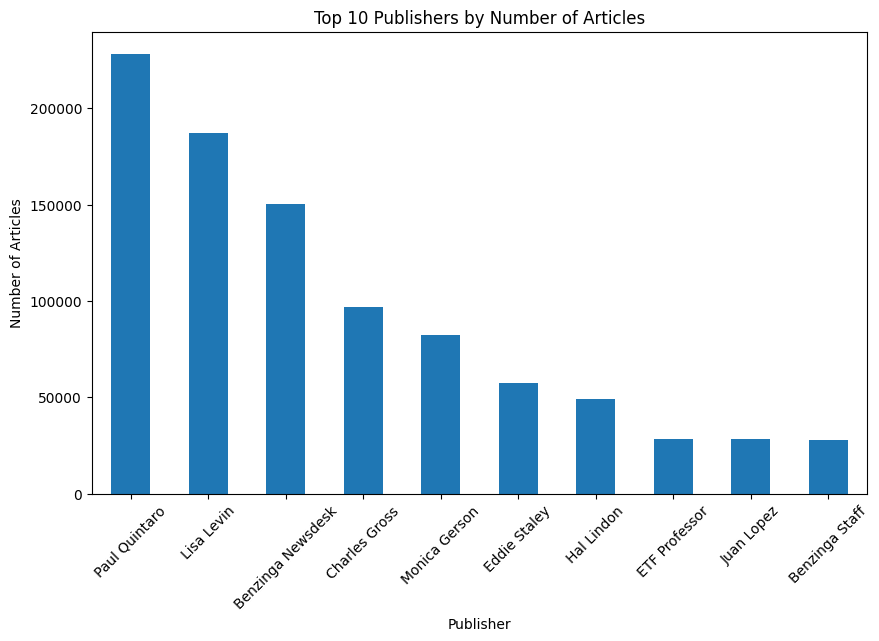

In [6]:
# Count articles per publisher
publisher_counts = data['publisher'].value_counts()

# Display top 10 publishers
publisher_counts.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


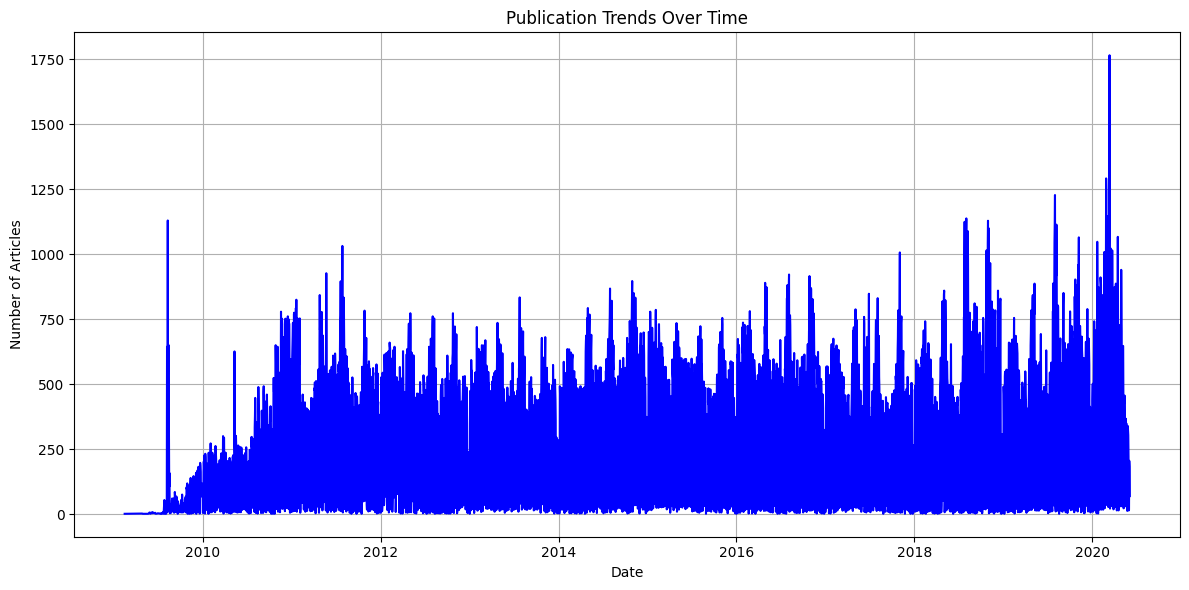

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'date' column is properly converted to datetime
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# Drop rows with invalid or NaT dates
data = data.dropna(subset=['date'])

# Group by date and analyze trends
publication_trends = data.groupby(data['date'].dt.date).size()

# Plot trends over time
publication_trends.plot(kind='line', figsize=(12, 6), color='blue')
plt.title('Publication Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()


Time serious analysis